# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Avinash Shanker

ID: 1001668570

NetID: AXS8570

## Rules

1. Work is to be done individually.
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa4.ipynb' and submit it. 
5. Do not alter the dataset name.

## Assignment Details

The purpose of this assignment is to cluster drug users using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is part of "Drug consumption". You can find more information here: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#. The class attribute has been transformed into a binary classification where '0' indicates NOUSER and '1' indicates USER.

You need to submit this ipython file after renaming it. 


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
# Import required Python packages here
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

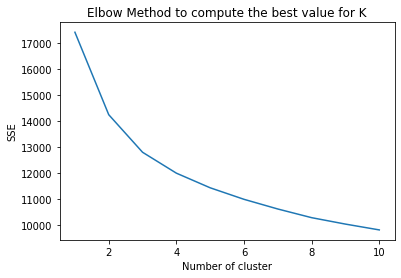


Here I can see that K=2 is the Best value by elbow method



In [3]:
#########################begin code for Task 1-a
df = pd.read_csv("drug_users.csv")

data = df[['Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore',
           'Ascore','Cscore','Impulsive','SS']]

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('Elbow Method to compute the best value for K')
plt.show()
print("\nHere I can see that K=2 is the Best value by elbow method\n")

#########################end code for Task 1-a

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [4]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

### Important!!!
### Created training and testing datasets will be used for the rest of this assignment except Task 3.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop('CLASS', axis =1)
y = df.CLASS

#Training Data split to 70% training and 30% Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
print('\nDataset After Splitting:')
print('\nSamples in training data:',X_train.shape,'\nSamples in test data: ',X_test.shape )
print('\n')



Dataset After Splitting:

Samples in training data: (1319, 12) 
Samples in test data:  (566, 12)






Black Dots indicate the Cluster Centeroids



Text(0.5, 1.0, 'Actual Training Labels')

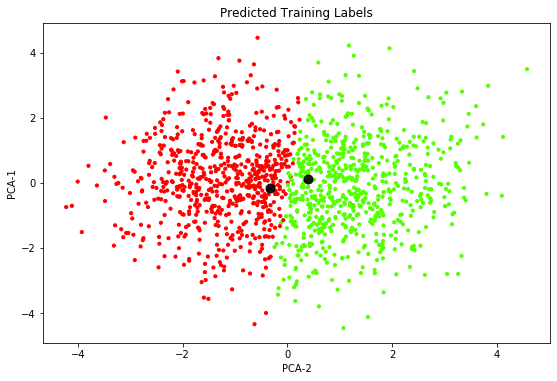

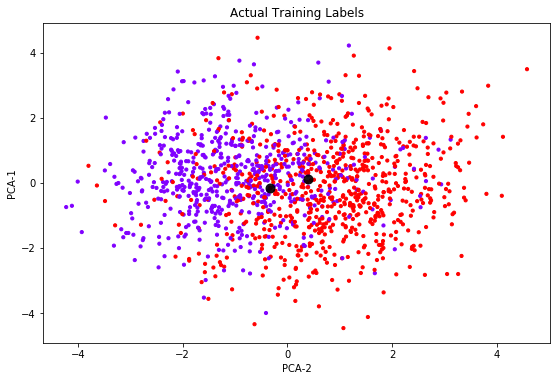

In [5]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model
kmeans = KMeans(n_clusters=2)
kmeans.fit_predict(X_train)

# Compute cluster centers and predict cluster index for each sample 
Cluster_index = kmeans.fit_predict(X_train)
centers = kmeans.cluster_centers_

# Model and fit the data to the PCA model
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train) 


# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)

x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
Predicted_train = Cluster_index
Actual_train = y_train

print('\n\nBlack Dots indicate the Cluster Centeroids\n')

plt.figure(figsize = (20,20))
plt.subplot(321)
plt.scatter(x, y, c=Predicted_train, s=10, cmap='prism')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=80, alpha=0.9)
plt.ylabel('PCA-1')
plt.xlabel('PCA-2')
plt.title('Predicted Training Labels')


plt.figure(figsize = (20,20))
plt.subplot(325)
plt.scatter(x, y, c=Actual_train, s=10, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=80, alpha=0.9)
plt.ylabel('PCA-1')
plt.xlabel('PCA-2')
plt.title('Actual Training Labels')


###################end code for Task 1-b-2

Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.



Red Dots indicate the Cluster Centeroids



Text(0.5, 1.0, 'Actual Testing Labels')

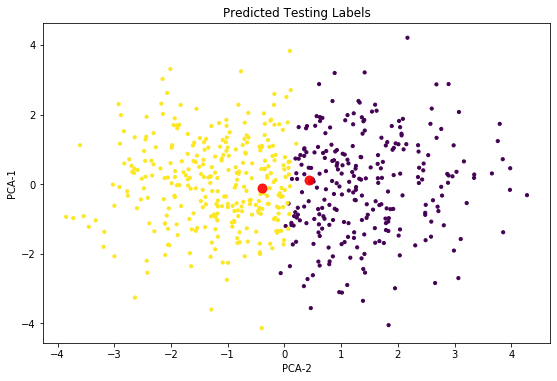

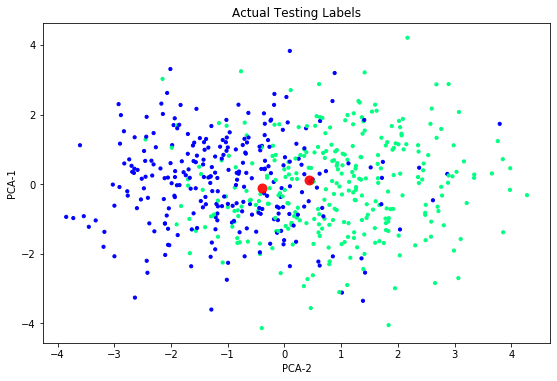

In [6]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample
kmeans = KMeans(n_clusters=2)
Cluster_index = kmeans.fit_predict(X_test)
centers = kmeans.cluster_centers_

# Model and fit the data to the PCA model
pca = PCA(n_components=2)  
X_test_pca = pca.fit_transform(X_test) 

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

Predicted_test = Cluster_index
Actual_test = y_test

print('\n\nRed Dots indicate the Cluster Centeroids\n')

plt.figure(figsize = (20,20))
plt.subplot(321)
plt.scatter(x, y, c=Predicted_test, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=80, alpha=0.9)
plt.ylabel('PCA-1')
plt.xlabel('PCA-2')
plt.title('Predicted Testing Labels')

plt.figure(figsize = (20,20))
plt.subplot(325)
plt.scatter(x, y, c=Actual_test, s=10, cmap='winter')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=80, alpha=0.9)
plt.ylabel('PCA-1')
plt.xlabel('PCA-2')
plt.title('Actual Testing Labels')


###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [7]:
###################begin code for Task 1-b-4: Print out a confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
Kmeans_Mat = confusion_matrix(y_test,Predicted_test)
Kmeans_Rep = classification_report(y_test,Predicted_test)
print('\n\nK-Means Confusion Matrices:')
print(Kmeans_Mat)
print(Kmeans_Rep)

###################end code for Task 1-b-4



K-Means Confusion Matrices:
[[ 40 224]
 [221  81]]
              precision    recall  f1-score   support

           0       0.15      0.15      0.15       264
           1       0.27      0.27      0.27       302

    accuracy                           0.21       566
   macro avg       0.21      0.21      0.21       566
weighted avg       0.21      0.21      0.21       566



# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [8]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
warnings.filterwarnings('ignore')
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
#pdm_train = pairwise_distances(X_train, Y=None, metric='euclidean', n_jobs=1)
pdm_train_cos = pairwise_distances(X_train,metric='cosine')
pdm_train_euc = pairwise_distances(X_train,metric='euclidean')
pdm_train_man = pairwise_distances(X_train,metric='manhattan')
#print(distance.shape)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
Comp_cosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')  
Predict_Data = Comp_cosine.fit_predict(pdm_train_cos)
Output1=f1_score(Predict_Data,y_train,average=None)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
Comp_euclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
Predict_Data = Comp_euclidean.fit_predict(pdm_train_euc)
Output2=f1_score(Predict_Data,y_train,average=None)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
Comp_manhattan = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')  
Predict_Data = Comp_manhattan.fit_predict(pdm_train_man)
Output3=f1_score(Predict_Data,y_train,average=None)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
Avg_cosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
Predict_Data = Avg_cosine.fit_predict(pdm_train_cos)
Output4=f1_score(Predict_Data,y_train,average=None)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
Avg_euclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
Predict_Data = Avg_euclidean.fit_predict(pdm_train_euc)
Output5=f1_score(Predict_Data,y_train,average=None)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
Avg_manhattan = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
Predict_Data = Avg_manhattan.fit_predict(pdm_train_man)
Output6=f1_score(Predict_Data,y_train,average=None)

print('\n')
print("F1-score for complete linkage + cosine", Output1)
print("F1-score for complete linkage + euclidean", Output2)
print("F1-score for complete linkage + manhattan", Output3)
print("F1-score for average linkage + cosine", Output4)
print("F1-score for average linkage + euclidean", Output5)
print("F1-score for average linkage + manhattan", Output6)

print('\nBest Model for Hierarchical Agglomerative Clustering:')
print('F1-score for average linkage + cosine is Maximum hence this one')

###################end code for Task 2-a



F1-score for complete linkage + cosine [0.18994413 0.26714801]
F1-score for complete linkage + euclidean [0.24227441 0.66484418]
F1-score for complete linkage + manhattan [0.38346728 0.69609508]
F1-score for average linkage + cosine [0.75917065 0.78179191]
F1-score for average linkage + euclidean [0.05581395 0.69443051]
F1-score for average linkage + manhattan [0.62234332 0.1369863 ]

Best Model for Hierarchical Agglomerative Clustering:
F1-score for average linkage + cosine is Maximum hence this one


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

Text(0.5, 1.0, 'Hierarchical Actual Training Labels')

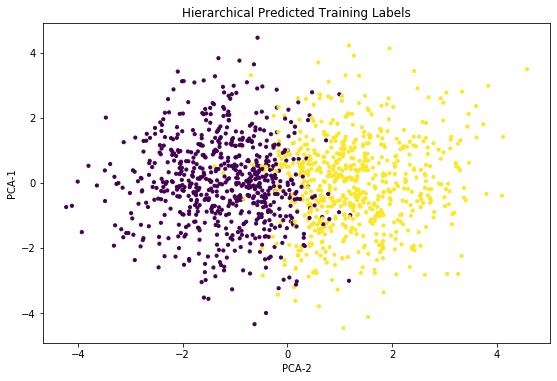

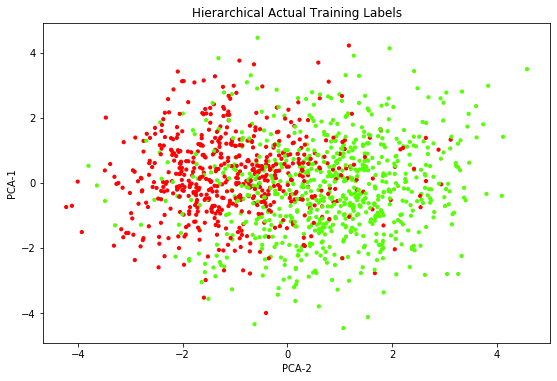

In [9]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels

## I have Chosen average linkage + cosine as the best model

pdm_train_cos = pairwise_distances(X_train, Y=None, metric='cosine', n_jobs=1)
Avg_cosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
Predict_Data = Avg_cosine.fit_predict(pdm_train_cos)


pca = PCA(n_components=2)  
Cluster_index = pca.fit_transform(X_train) 

# Visualize the predicted training labels versus actual training labels. 

x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
Predicted_train = Predict_Data
Actual_train = y_train

plt.figure(figsize = (20,20))
plt.subplot(321)
plt.scatter(x, y, c=Predicted_train, s=10, cmap='viridis')
plt.ylabel('PCA-1')
plt.xlabel('PCA-2')
plt.title('Hierarchical Predicted Training Labels')

plt.figure(figsize = (20,20))
plt.subplot(325)
plt.scatter(x, y, c=Actual_train, s=10, cmap='prism')
plt.ylabel('PCA-1')
plt.xlabel('PCA-2')
plt.title('Hierarchical Actual Training Labels')

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

Text(0.5, 1.0, 'Actual True Labels')

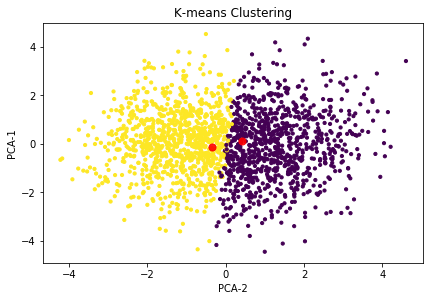

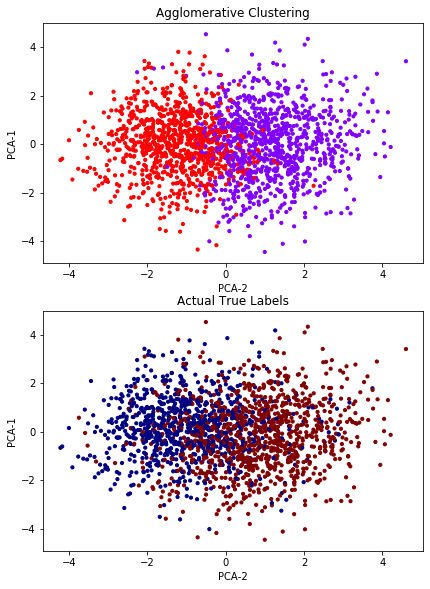

In [10]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels
X = df.drop('CLASS', axis =1)
Y = df.CLASS

### Kmeans Clustering

kmeans = KMeans(n_clusters=2)
Cluster_index = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Model and fit the data to the PCA model
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X) 

x = X_pca[:, 0]
y = X_pca[:, 1]

Predicted_Kmeans = Cluster_index
Actual_Label = Y



### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train_cos = pairwise_distances(X, Y=None, metric='cosine', n_jobs=1)
Avg_cosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
Predicted_Hiera = Avg_cosine.fit_predict(pdm_train_cos)
# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)



# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
plt.figure(figsize = (15,15))
plt.subplot(321)
plt.scatter(x, y, c=Predicted_Kmeans, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.9)
plt.ylabel('PCA-1')
plt.xlabel('PCA-2')
plt.title('K-means Clustering')

plt.figure(figsize = (15,15))
plt.subplot(323)
plt.scatter(x, y, c=Predicted_Hiera, s=10, cmap='rainbow')
plt.ylabel('PCA-1')
plt.xlabel('PCA-2')
plt.title('Agglomerative Clustering')

plt.subplot(325)
plt.scatter(x, y, c=Actual_Label, s=10, cmap='jet')
plt.ylabel('PCA-1')
plt.xlabel('PCA-2')
plt.title('Actual True Labels')

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [11]:
###################begin code for Task 3-b
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
Kmeans_Matrix = confusion_matrix(Y,Predicted_Kmeans)
Kmeans_Report = classification_report(Y, Predicted_Kmeans)
print('\n\nK-Means Confusion Matrix and Classification Report:')
print(Kmeans_Matrix)
print(Kmeans_Report)

Hier_Matrix = confusion_matrix(Y,Predicted_Hiera)
Hier_Report = classification_report(Y,Predicted_Hiera )
print('\n\nHierarchical Confusion Matrix and Classification Report:')
print(Hier_Matrix)
print(Hier_Report)

True_Matrix = confusion_matrix(Y,Actual_Label)
True_Report = classification_report(Y,Actual_Label )
print('\n\nActual Data Confusion Matrix and Classification Report:')
print(True_Matrix)
print(True_Report)


###################end code for Task 3-b



K-Means Confusion Matrix and Classification Report:
[[157 683]
 [773 272]]
              precision    recall  f1-score   support

           0       0.17      0.19      0.18       840
           1       0.28      0.26      0.27      1045

    accuracy                           0.23      1885
   macro avg       0.23      0.22      0.22      1885
weighted avg       0.23      0.23      0.23      1885



Hierarchical Confusion Matrix and Classification Report:
[[203 637]
 [777 268]]
              precision    recall  f1-score   support

           0       0.21      0.24      0.22       840
           1       0.30      0.26      0.27      1045

    accuracy                           0.25      1885
   macro avg       0.25      0.25      0.25      1885
weighted avg       0.26      0.25      0.25      1885



Actual Data Confusion Matrix and Classification Report:
[[ 840    0]
 [   0 1045]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    

In [12]:
## Results Comparision of K-Means and Hierarchical Agglomerative Clustering
print("\n\nInferences:")
print('1> K-Means has higher precision, recall and F1-Score when comapared to Agglomerative method')
print('2> This Proves K-means is better Method')
print('3> From Scatter plot visually, clustering is more successful in K-Means as compared to Agglomerative Method')
print('4> Computation Complexity for Agglomerative clustering is in Ploynomial Time')
print('5> Computation Complexity for K-means clustering is in Linear Time making K-Means much faster for computation')



Inferences:
1> K-Means has higher precision, recall and F1-Score when comapared to Agglomerative method
2> This Proves K-means is better Method
3> From Scatter plot visually, clustering is more successful in K-Means as compared to Agglomerative Method
4> Computation Complexity for Agglomerative clustering is in Ploynomial Time
5> Computation Complexity for K-means clustering is in Linear Time making K-Means much faster for computation


## References

1. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
2. https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/
3. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
4. https://www.youtube.com/watch?v=X3Q6JFl8vjA&index=2&t=302s&list=LLzicwqsQBBu4sJ48-EEfY6g
5. https://matplotlib.org/examples/color/colormaps_reference.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
7. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
8. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_predict
9. https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython
10. https://pythonprogramminglanguage.com/kmeans-elbow-method/


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points